# Redes Neuronales Convoluciones con arquitectura Pytorch



## Introducción
Las __redes convolucionales__ ({cite:p}`lecun1989backpropagation`), también conocidas como redes neuronales convolucionales, (o convolutional neural networks CNN o __ConvNet__) , son un tipo especializado de red neuronal para procesar datos que tienen una topología similar a una cuadrícula.

Las __ConvNet__ se diseñaron para procesar imágenes y tratan de simular el funcionamiento de la visión humana. Restringen la arquitectura para usar un conjunto de pesos más reducido. En particular, a diferencia de una red neuronal normal, las capas ConvNet tienen neuronas dispuestas en 3 dimensiones: ancho, alto, profundidad (se adoptan las iniciales en inglés $w,h,d$). En las redes neuronales densas se tiene una matriz de pesos $(m,n)$ para conectar una capa anterior de $n$ neuronas con una de $m$. Aquí se conectarán las $n$ neuronas con $d$ capas convolucionales usando un bloque de $(w,h,d)$ pesos. La reducción de complejidad viene dado porque la dimensión de $(w,h)$ es muy inferior a $(m,n)$

Una __operación de convolución__ básica que se aplica a una imagen bidimensional I como entrada, usando un kernel o filtro K bidimensional y que nos da como resultado una nueva imagen S sería por ejemplo:

$$S(i,j)=(K*I)(i,j)=\displaystyle\sum_{m}\displaystyle\sum_{n}=I(m,n)K(i-m,j-n)$$

Un ejemplo gráfico del proceso de convolución para una entrada con 3 canales y dimensión __5x5__ $(W_1=5, H_1=5, D_1=3)$ al que se le aplica un filtro __3x3__ con un salto de __2__ y un relleno a cero de __1__  obteniendo __2__ canales de salida $(K=2, F=3, S=2, P=1)$ es

<img src="https://github.com/upmValeriano/notebook/blob/main/AA/images/ExampleFilterConv.png?raw=1" width="900px">

Como se puede comprobar el elemento $-3$ del primer mapa de salida se obtiene multiplicando uno a uno los elementos de cada filtro por los canales de entrada y sumando todos los productos más el valor del bias. Idem para el siguiente elemento $-1$ una vez ejecutado el salto hacia la derecha en columnas. Una vez llegado hasta la última columna se ejecuta un salto en filas.

Una __Arquitectura Convolucional__ tipo estará compuesta por las capas: [INPUT - CONV - RELU - POOL - FC]. Cuyo detalle es:

- __INPUT__ contendrá los valores de píxeles raw de la imagen, en este caso una imagen de ancho b, altura h, y con tres canales de color R, G, B. El vector de datos de entrada va a ser un tensor o matriz de 4 dimensiones __(n, c, b, h)__, donde __n__ representará el número de observaciones en el lote tratado, __c__ el número de canales, __b__ es el ancho de la imagen y __h__ es la altura de la imagen.

- La capa __CONV__ calculará la salida de las neuronas que están conectadas a las regiones locales en la entrada, cada una calculando un producto de punto entre sus pesos y una pequeña región a la que están conectadas en el volumen de entrada. Los pesos que conectan los pixels localmente son compartidos y son __aprendibles__. En una capa convolucional los parámetros entrenables están formados por un filtro $W_l$ cuyas dimensiones son __(co, ci, f, f)__, donde __co__ es el número de canales de salida (los canales del tensor $X_l$), __ci__ es el número de canales de entrada (los canales del tensor $X_{l-1}$) y __f__ es el tamaño del filtro. Además se incluye un parámetro de bias $B_l$, que es un vector de dimensiones __(co)__.

- La capa __RELU__ aplicará una función de activación por elementos, como el umbral $(max(0,x))$ en cero. Esto deja el tamaño del tensor de esta capa sin cambios __(n, c, b, h)__.
- La capa __POOL__ realizará una operación de __downsampling__ a lo largo de las dimensiones espaciales (ancho, alto), lo que dará como resultado un volumen __(n, c, b*, h*)__, siendo __(b*,h*)__ inferiores a __(b,h)__. Esta capa no utiliza pesos aprendibles.
- La capa __FC o densa__  (es decir, totalmente conectada) calculará los puntajes de clase. Las capas densas tienen una matriz entrenable $W_l$ de dos dimensiones __(m,p)__, siendo __m__ el nº de carácteristicas de la salida de la capa (el vector $X_l$) y __p__ el número de características de la entrada a la capa (el vector $X_{l-1}$)

### Reglas generales para modelar una red convolucional

La __capa de entrada__ (que contiene la imagen) debe ser divisible por $2^n$. Los números comunes incluyen 32 (por ejemplo, CIFAR-10), 64, 96 (por ejemplo, STL-10) o 224 (por ejemplo, ImageNet), 384 y 512.

Las __capas conv__ deben usar filtros pequeños (por ejemplo, 3x3 o como máximo 5x5), usar un salto de $S = 1$ y, lo que es más importante, rellenar el volumen de entrada con ceros (padding) de tal manera que la capa conv no altere las dimensiones espaciales de la entrada (si F = 3, P = 1; si F = 5, P=2; en general $P = (F - 1)/2$).

Las __capas de pool__ se encargan de reducir el muestreo de las dimensiones espaciales de la entrada. La configuración más común es usar max-pooling con campos receptivos 2x2 (es decir, F = 2), y un salto de 2 (S = 2); esto es, se descarta exactamente el 75%. Más infrecuente, por la dificultad de encajarlo en la dimensión de la entrada es el uso de F = 3 y S = 2. Dimensiones de maxpooling superiores son muy infrecuentes ya que es muy agresiva y deficitaria y conduce a peores rendimentos.


### Algunas arquitecturas convolucionales destacadas

Hay varias arquitecturas en el campo de las Redes Convolucionales que tienen un nombre. Los más comunes son:

- __LeNet__. Las primeras aplicaciones exitosas de redes convolucionales fueron desarrolladas por {cite:p}`lecun1998gradient` en la década de 1990. De estos, el más conocido es la arquitectura LeNet que se utilizaba para leer códigos postales, dígitos, etc.
- __AlexNet__. El primer trabajo que popularizó las redes convolucionales en visión artificial fue el AlexNet, desarrollado por {cite:p}`krizhevskyimagenet` (2012). El AlexNet se presentó al desafío ImageNet ILSVRC en 2012 y superó significativamente al segundo finalista (error top 5 del 16% en comparación con el subcampeón con un error del 26%). La red tenía una arquitectura muy similar a LeNet, pero era más profunda, más grande y presentaba capas convolucionales apiladas una encima de la otra (anteriormente era común tener una sola capa CONV siempre seguida inmediatamente por una capa POOL).
- __ZF Neto__. El ganador de ILSVRC 2013 fue una Red Convolucional de Matthew Zeiler y Rob Fergus. Se hizo conocido como ZFNet (abreviatura de Zeiler & Fergus Net). Fue una mejora en AlexNet al ajustar los hiperparámetros de la arquitectura, en particular al expandir el tamaño de las capas convolucionales medias y hacer que el paso y el tamaño del filtro en la primera capa sean más pequeños.
- __GoogLeNet__. El ganador de ILSVRC 2014 fue una red convolucional de {cite:p}`szegedy2014googlenet` de Google. Su principal contribución fue el desarrollo de un Módulo de Inicio que redujo drásticamente el número de parámetros en la red (4M, en comparación con AlexNet con 60M). Además, este documento utiliza Average Pooling en lugar de capas totalmente conectadas en la parte superior de ConvNet, eliminando una gran cantidad de parámetros que no parecen importar mucho. También hay varias versiones de seguimiento de GoogLeNet, la más reciente __Inception-v4__.
- __VGGNet__. El subcampeón en ILSVRC 2014 fue la red de Karen Simonyan y Andrew Zisserman que se conoció como VGGNet. Su principal contribución fue mostrar que la profundidad de la red es un componente crítico para un buen rendimiento. Su mejor red final contiene 16 capas CONV / FC y, atractivamente, presenta una arquitectura extremadamente homogénea que solo realiza circunvoluciones 3x3 y agrupación 2x2 desde el principio hasta el final. Su modelo preentrenado está disponible para uso plug and play en Caffe. Una desventaja de VGGNet es que es más caro de evaluar y utiliza mucha más memoria y parámetros (140M). La mayoría de estos parámetros se encuentran en la primera capa totalmente conectada, y desde entonces se descubrió que estas capas FC se pueden eliminar sin degradar el rendimiento, lo que reduce significativamente el número de parámetros necesarios.
- __ResNet__. Residual Network desarrollado por {cite:p}`kaiming2015deep` fue el ganador de ILSVRC 2015. Cuenta con conexiones de salto especiales y un uso intensivo de la normalización por lotes. A la arquitectura también le faltan capas totalmente conectadas al final de la red. ResNets son actualmente modelos de red neuronal convolucional de última generación y son la opción predeterminada para usar ConvNets en la práctica (a partir del 10 de mayo de 2016).

### Esquema de la arquitectura VGGNet

El modelo logra una precisión de prueba del 92,7 % entre los cinco primeros en ImageNet, que es un conjunto de datos de más de 14 millones de imágenes pertenecientes a 1000 clases. Dentro del modelo VGGNet se implementa la arquitectura VGG16:

<img src="https://github.com/upmValeriano/notebook/blob/main/AA/images/arquConv_VGG16.png?raw=1" width="500px">


### Redes Residuales Profundas

Las Redes Residuales Profundas (__ResNets__) consisten en muchas "Unidades Residuales" apiladas. Cada unidad (ver la siguiente figura) puede expresarse de forma general:

$$y_l = h(x_l) + F(w_l, W_l)$$
$$x_{l+1}=f(y_l)$$

<img src="https://github.com/upmValeriano/notebook/blob/main/AA/images/ResNetUnit.png?raw=1" width="75px">

Dónde $x_l$  y   $x_{l+1}$  son entradas y salidas de la unidad $l$-ésima, $F$  es una función residual, $h(x_l)=x_l$  es un mapeo de identidad y $f$ es la función ReLU.

Para un mayor detalle y por ejemplo profundizar en la retropropagación de las ResNets consultar el capitulo de Kaiming:

https://link.springer.com/chapter/10.1007/978-3-319-46493-0_38

Ver también: https://pytorch.org/hub/pytorch_vision_resnet/

## Entrenamiento de una red convolucional

En cada capa de la red convolucional tendrá lugar, según tipología, un proceso de filtro convolucional, agrupación o ponderación lineal seguido de una activación. Todo ello constituye el paso adelante o proceso __forward__ de la red. Para una red ya entrenada, el proceso forward permite obtener las __predicciones__.

El entrenamiento de la red requiere un proceso de __retropropagación__ o __backpropagation__. Las capas finales que tienen que clasificar los patrones que han extraido las capas convolucionales son __capas densas__, como el perceptron o completamente conectadas ("full connected"). Puede haber 2 o 3 capas densas y en ellas el cálculo de las __matrices delta__ y el ajuste de las matrices __W__ por su gradiente se realiza tal cual se ha comentado en el perceptron.

El bloque de capas densas, acabará propagando una matriz $\Delta$ que se usará para obtener el gradiente y entrenar sus Filtros y Bias y propagar un $\Delta$ a su vez a la capa anterior. Dependiendo del tipo de capa el proceso de forma esquemática será así:
x">


### Capa de aplanado

   En las arquitecturas aparece una capa de aplanado cuya función forward es convertir un tensor de dimensión __(n, c, b, h)__ en bidimensional __(n, c*b*h) = (n, m)__ para que sea procesado por el bloque de capas densas. Por tanto la retropropagación recibirá una matriz $\Delta_{n,m}^l$ bidimensional y tiene que recolocarla a tamaño  $\Delta_{n,c,b,h}^{l-1}$. Estás capas no tienen configuración dinámica y no tiene que ajustar ninguna matriz __W__.  



### Capa de Agrupación

   Las capas de agrupación (__maxpooling__) tienen también una configuración estática, el parámetro __p__ de reducción de escala y la regla de agrupación, no hay matriz __W__ entrenable. En la __retropropagación__ sólo hay que progragar la matriz $\Delta^l$ recibida para obtener la matriz  $\Delta^{l-1}$. El tamaño de $\Delta^{l-1}$ se incrementará según la inversa de la escala __p__ y la obtención de los $\delta_{ij}^{l-1}$ a partir de $\delta_{ij}^l$. Por ejemplo si __p=2__ y se tiene agrupación por máximo, se repetirá cada valor $\delta_{ij}^l$ en una región __2x2__ de  $\Delta^{l-1}$.


### Capa de convolución

* __Entrenamiento:__ partiendo de las matrices $A^{l-1}$ y $\Delta^l$ y considerando las dimensiones del filtro convolucional $W^l$ hay que moverse por $A^{l-1}$ multiplicando sus regiones por cada uno de los escalares $\delta^l_{ij}$. El resultado es una matriz ($\nabla W^l$), de la misma dimensión que &W^l$ a la que se acumula para optimizarla:

$$W^l \leftarrow -\eta \nabla W^l$$

Su obtención es como se muestra gráficamente en el siguiente dibujo:





<img src="https://github.com/upmValeriano/notebook/blob/main/AA/images/conv_gradW3.png?raw=1" width="800px">


* __Nueva propagación:__ partiendo de las matrices $W^l$ y $\Delta^l$, se aplica lo que se denomina una __convolución traspuesta__, donde el filtro $W^l$ se aplica sobre cada $\delta^l_{ij}$ para obtener la matriz $\Delta^{l-1}$ de la forma en que se explica en el siguiente gráfico:

<img src="https://github.com/upmValeriano/notebook/blob/main/AA/images/conv_gradA.png?raw=1" width="800px">

Y continuaría así:

<img src="https://github.com/upmValeriano/notebook/blob/main/AA/images/conv_gradA2.png?raw=1" width="800px">

La convolución traspuesta, por ejemplo, existe como método público en la arquitectura pytorch y además de ejecutarse internamente en el proceso de entrenamiento, se usa para modelos más avanzados como forma de trasladar tensores de una escala inferior a una superior dentro del proceso forward.

<a href="https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html">https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html</a>


__Observaciones:__ En el cuaderno _"Maqueta de red neuronal convolucional"_ se realiza una justificación de las anteriores operaciones convolucionales en un caso particular; sin padding ni strike, pero que resulta suficiente general.

### Otras consideraciones

* __Función de pérdida (Loss Function)__ o de Coste: La función de pérdida más habitual es la __entropia cruzada__ que va asociada con el uso de la función de activación __softmax__ en la última capa.

La función __softmax__ a partir del vector ponderación lineal $\bar{z}$ obtiene una activación a un vector probabilidad $\bar{p}$, donde cada elemento del vector es:

$$p_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$$

Y la función de pérdida __cross_entropy__ entre $\bar{p}$ y el valor real de entrenamiento $\bar{y}$

$$p_i = -\sum_j y_j \cdot ln(p_j)$$

Tiene la ventaja que en combinación con __softmax__ da un valor del gradiente __delta__ muy simple para la última capa (__L__):

$$\frac{\partial C}{\partial \bar{z^L}}=\bar{\delta^L} = \bar{p} - \bar{y}$$


<a href="https://pytorch.org/docs/stable/nn.html#loss-functions">https://pytorch.org/docs/stable/nn.html#loss-functions</a>

* __Optmizador__ que hace referencia en la manera en que se ajustan los pesos y bias para optimizar la red.

En el __gradiente descenso__ se aplican los gradientes usando un __ratio de entrenamiento__ $\eta$.

El __gradiente descenso estocástico__ muestrea observaciones en un conjunto de entrenamiento de gran dimensión.

El optimizador __Adam__ aplica una tasa de entrenamiento variable que se adapta automáticamente en las distintas capas de la arquitectura.

## Ejercicio práctico de entrenamiento de un conjunto de imagenes usando convoluciones

El manejo de mapas implica pasar de usar matrices como modelo de datos a tensores que son matrices de varias dimensiones. Los costes computacionales del entrenamiento de una red convolucional profunda con un conjunto de entrenamiento con valores $N$ alto es muy elevado. Todo ello lleva a ser más práctico usar una arquitectura de desarrollo como __Pytorch__ en lugar de __sk-learn__ y usar una arquitectura de ejecución __GPU__ en lugar de __CPU__. Este cuaderno está preparado para usarse en Google Colaboratory, donde se puede realizar un ejecución gratuita en __GPU__.

PyTorch es una biblioteca de aprendizaje automático de código abierto basada en la biblioteca de Torch, utilizado para implementar aplicaciones de visión artificial o procesamiento de lenguajes naturales. Desarrollado por el Laboratorio de Investigación de Inteligencia Artificial4 de Facebook (FAIR).Es un software libre y de código abierto liberado bajo la Licencia Modificada de BSD. A pesar de que la interfaz de Python está más pulida y es el foco principal del desarrollo, PyTorch también tiene una interfaz en C++.

Varios software de Aprendizaje Profundo están construidas utilizando PyTorch, como Tesla Autopilot, Uber's Pyro, HuggingFace's Transformers, PyTorch Lighting, y Catalyst.

PyTorch proporciona dos características de alto nivel:

- Computación de tensores (como NumPy ) con una aceleración fuerte a través de unidades de procesamientos gráficos (GPU).
- Redes neuronales profundas construidas en un sistema de diferenciación automática de bases de datos.

https://pytorch.org/


Comprendido el funcionamiento de __sk-learn__, el diseño de una red neuronal en __Pytorch__ requiere los siguientes pasos básicos:

- Los datos se estructuran en tensores de 4 dimensiones ($N, C, B, H$) para manejar imagenes bidimensionales ($B, H$). Siendo $N$ el número de ejemplos del lote o de un conjunto completo de entrenamiento, $C$ es el número de canales de entrada (3 para RGB) o la profundidad de mapas de cada capa.
- Hay que definir una clase con la estructura de las capas de la red. La clase tendrá un constructor (__Init__) y un método __forward__. Crearemos un objeto llamando al constructor. Por ejemplo: __model = CNN_long()__.
- Hay que especificar la función de pérdida y el método de optimización.
- El __entrenamiento__ requerirá hacer un bucle por época donde se extraigan 1 a 1 los lotes del conjunto de entrenamiento y se vayan calculando las pérdidas y entrenando la red. Es un proceso estándar aunque algo más abierto que en __sk-learn__.
- El modelo entrenado se puede guardar en fichero. Y una vez guardado es posible su recuperación para no tener que repetir el entrenamiento.

### Modos de ejecución del cuaderno

El cuaderno tiene una serie de variables booleanas que le permite ejecutarlo de diferentes maneras:

- __googleColaboratory__ : estando a True activará las opciones de __acceso a Drive de Google__ y a la ejecución __CUDA de Google Colaboratory__.
- __entrenamiento__ : estando a True ejecuta el entrenamiento y guarda los datos a fichero en la carpeta __data__ ya sea en Drive o local. Si está a False recupera la configuración de fichero existente en __data__.
- __resNet__ : estando a True se ejecuta sobre el modelo definido en __class ResNet(nn.Module)__ que implementa una red residual. Si está a False carga un modelo en función del valor de la variable _convolucionProfunda_.
- __convolucionProfunda__ : Si _resNet_ está a False y aquí aparece True implementa __class CNN_long(nn.Module)__ con 3 bloques y hasta 6 convoluciones. En ella se presenta un estilo muy simple de programación de Pytorch basado en el uso de _nn.Sequential_. Si está a False se implementa __class CNN_short(nn.Module)__ con sólo 2 convoluciones.

El __entrenamiento__ de un modelo CNN_short es viable en una máquina CPU como Windows. Para el resto de modelos lo recomendable es una ejecución en una máquina con capacidad GPU. Google Colaboratory tiene un entorno libre que permite hacerlo manteniendo la sesión activa de forma manual. Con una cuenta de pago sería posible hacer esta ejecución en un segundo plano.


<img src="https://github.com/upmValeriano/notebook/blob/main/AA/images/logo_googlecolab.png?raw=1" width="150px">

<p><a href="https://githubtocolab.com/upmValeriano/notebook/blob/main/AA/05.07A_RRNN_Convoluciones_CIFAR_10.ipynb" target="_blank">
<FONT SIZE=4>Abrir este cuaderno en Google Colab</font></a></p>

In [1]:
import glob, os
import numpy as np
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
from torch.autograd import Variable
from tqdm import tqdm

**Se definen los parámetros de ejecución**

In [2]:
googleColaboratory = True
entrenamiento = True
convolucionProfunda = False
resNet = False
if googleColaboratory:
    import google as goo

### Carga de Datos

PyTorch tiene dos primitivas para trabajar con bases de datos conocidas para hacer pruebas: __torch.utils.data.DataLoader__ y __torch.utils.data.Dataset__.

__Dataset__ almacena los ejemplos y sus correspondientes etiquetas, y __DataLoader__ genera un iterable sobre el conjunto de datos.

Se utiliza la base de datos en línea __CIFAR10__ con 50.000 imagenes de entrenamiento de 10 clases distintas y 10.000 imagenes para prueba:

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Las imágenes en CIFAR-10 tienen un tamaño de 3x32x32, es decir, imágenes en color de 3 canales de 32x32 píxeles de tamaño.

La base de datos es accesible desde __torchvision.datasets__


In [3]:
if googleColaboratory:
    goo.colab.drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import torch
from torchvision import datasets, transforms


lote_size = 128
lote_size = 4
# Download and load the training data
if googleColaboratory:
  trainset = datasets.CIFAR10('/content/drive/My Drive/Colab Notebooks/data/', download=True, train=True, transform=transforms.ToTensor())
else:
  trainset = datasets.CIFAR10('data/', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=lote_size, shuffle=True)

# Download and load the test data
if googleColaboratory:
  testset = datasets.CIFAR10('/content/drive/My Drive/Colab Notebooks/data/', download=True, train=False, transform=transforms.ToTensor())
else:
  testset = datasets.CIFAR10('data/', download=True, train=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=lote_size, shuffle=True)

print("Tensor Entrenamiento=", trainset.data.shape, "Tensor Validación=", testset.data.shape)
clases=('avion', 'coche','pajaro', 'gato', 'ciervo','perro','rana','caballo','barco', 'camión')

100%|██████████| 170M/170M [00:02<00:00, 76.7MB/s]


Extracting /content/drive/My Drive/Colab Notebooks/data/cifar-10-python.tar.gz to /content/drive/My Drive/Colab Notebooks/data/
Files already downloaded and verified
Tensor Entrenamiento= (50000, 32, 32, 3) Tensor Validación= (10000, 32, 32, 3)


__Se visualizan algunas de las imagenes cargadas__

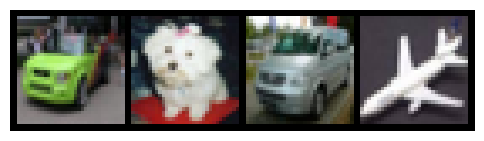

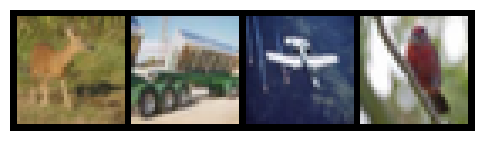

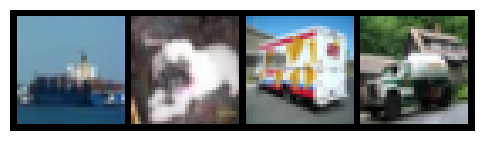

In [5]:
from torchvision.utils import make_grid
for ix in range(3):
  for images, _ in trainloader:
    plt.figure(figsize=(6,3))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

### Clases con la definición de la Red

In [6]:
class CNN_short(nn.Module):
    def __init__(self):
        super(CNN_short, self).__init__()
        # capa convolucional (ve tensores Nx3x32x32 y devuelve tensores Nx6x28x28)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2)   # Devuelve tensores  Nx6x14x14

        # capa convolucional (ve tensores Nx6x14x14  y devuelve tensores Nx16x10x10)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        # Capa oculta totalmente conectada. Salida a 10 clases

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # Entran tensores Nx3x32x32 y salen Nx6x14x14
        x = self.pool(F.relu(self.conv2(x))) # Entran tensores Nx6x14x14 y salen Nx16x5x5
        # Se aplana la salida de conv2 a (batch_size, 16 * 5 * 5)
        #x = x.view(x.size(0), -1)
        x = x.view(-1, 16*5*5) # Se aplana a un vector 16x5x5 = 400
        x = F.relu(self.fc1(x)) # Capa densa de 400 -> 120
        #x = F.dropout(x, 0.5) #dropout se incluye para evitar overfitting
        x = F.relu(self.fc2(x)) # Capa densa de 120 -> 84
        #x = F.dropout(x, 0.5) #dropout se incluye para evitar overfitting
        x = self.fc3(x) # Capa densa de 84 -> 10 con la puntuación por clase
        return x

In [7]:
class CNN_long(nn.Module):
  def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # salida: N x 16 x 16 x 64

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # salida: N x 8 x 8 x 128

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # salida: N x 4 x 4 x 256

            nn.Flatten(), # Se aplana a un vector 4 x 4 x 256 = 4096
            nn.Linear(256*4*4, 1024), # Red densa FC : De 4096 -> 1024
            nn.ReLU(),
            nn.Linear(1024, 512),  # Red densa FC : De 1024 -> 512
            nn.ReLU(),
            nn.Linear(512, 10))  # Red densa FC : De 512 -> 10 con la puntuación por clase

  def forward(self, xb):
        return self.network(xb)

#### Definición de la red residual (ResNet)

La red está formada por la repetición de un bloque similar (__ResidualBlock__). El bloque está formado por una secuencia:

$$[CONV][BN][ReLU][CONV][BN]$$

Las convoluciones empleadas son todas de tamaño de filtro 3, salto 1 (en el primer bloque o layer y 2 en el resto) y padding o relleno a ceros 1. Los bloques residuales se integran en 3 capas o __layers__. La estructura de la red de convolución completa usando los bloques es:

$$[CONV][BN][ReLU][LAYER1][LAYER2][LAYER3][POOL][FC]$$

La estructura aparece explicitamente en el cuaderno trás hacer __print(model)__.

El paso $[BN]$ es una Normalización (restando la media $\mu$ y dividiendo por la desviación típica $\sigma$)

Se utiliza una única capa conectada entre el vector aplanado el número de etiquetas del modelo.

La acumulación del valor residual se hace en cada bloque en la instrucción __out += residual__, copiandose el valor __x__ existente al principio.

Pytorch incluye en línea unas definiciones de ResNet:

https://pytorch.org/hub/pytorch_vision_resnet/

Se puede descargar el modelo entrenado o no. El no entrenado puede utilizarse para un entrenamiento propio. Lo único tener en cuenta que el modelo devuelve hasta 1000 clases en salida. Si se usan 10 como en CIFAR10, el puntuaje máximo estará en los 10 primeros valores de esos 1000

In [8]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [9]:
# Se crea un modelo CNN
#if googleColaboratory:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #training with either cpu or cuda


if resNet:
    if googleColaboratory:
      model = ResNet(ResidualBlock, [2, 2, 2]).to(device)
    else:
        model = ResNet(ResidualBlock, [2, 2, 2])
elif convolucionProfunda:
  model = CNN_long()
else:
  model = CNN_short()
if googleColaboratory:
  model = model.to(device=device) #to send the model for training on either cuda or cpu

print(model)



CNN_short(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Especificar la Función de Pérdida y el Optimizador

http://pytorch.org/docs/stable/nn.html#loss-functions

http://pytorch.org/docs/stable/optim.html



In [10]:
import torch.optim as optim

# Se especifica la función pérdida
loss_func = nn.CrossEntropyLoss()

# Se especifica el optimizador
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.001)

### Entrenamiento de la red

Hay que observar como la pérdida en entrenamiento y validación disminuye con el tiempo; si la pérdida de validación aumenta alguna vez, indica un posible sobreajuste.

In [11]:
#from torch.autograd import Variable
num_epochs = 10
model.train()

lineasTraza = int(len(trainloader)/20)+1
numlineas = 0
#pbar = tqdm(range(num_epochs))
# Train the model
for epoch in range(num_epochs):
#for epoch in pbar:
    if not entrenamiento:
      print("No habilitada la opción de entrenamiento")
      break
    correct = 0
    total = 0
    for images, labels in trainloader:
        images = images.to(device=device)
        labels = labels.to(device=device)

        # gives batch data, normalize x when iterate train_loader
        #b_x = Variable(images)   # batch x
        #b_y = Variable(labels)   # batch y
        #output = model(b_x)
        #loss = loss_func(output, b_y)
        output = model(images)
        loss = loss_func(output, labels)
        pred_y = torch.max(output, 1)[1].data.squeeze()
        correct += (pred_y == labels).sum().item()
        total +=float(labels.size(0))
        # clear gradients for this training step
        optimizer.zero_grad()

        # backpropagation, compute gradients
        loss.backward()
        # apply gradients
        optimizer.step()
        numlineas+=1
        if numlineas == lineasTraza:
            print('*', end='')
            numlineas=0

    print ('Época [{}], Accuracy-Entrenamiento {:.4f}'.format(epoch + 1, 100*correct/total))

*******************Época [1], Accuracy-Entrenamiento 31.7560
********************Época [2], Accuracy-Entrenamiento 46.4200
********************Época [3], Accuracy-Entrenamiento 51.3000
********************Época [4], Accuracy-Entrenamiento 54.9400
********************Época [5], Accuracy-Entrenamiento 57.6660
********************Época [6], Accuracy-Entrenamiento 59.7820
********************Época [7], Accuracy-Entrenamiento 61.7960
********************Época [8], Accuracy-Entrenamiento 63.4320
********************Época [9], Accuracy-Entrenamiento 64.2900
********************Época [10], Accuracy-Entrenamiento 65.5340


### Se hace un  back-up del modelo generado

In [12]:
filename = "cifar10_profunda.pt" if convolucionProfunda else "cifar10_short.pt"
if resNet: filename = "cifar10_resnet.pt"
filename = "/content/drive/My Drive/Colab Notebooks/data/" + filename if googleColaboratory else "data/" + filename
if entrenamiento:
    print("Backup al fichero=", filename)
    torch.save(model.state_dict(), filename)
    if googleColaboratory:
      goo.colab.files.download(filename)
else:
    print("No habilitado Backup del fichero")


Backup al fichero= /content/drive/My Drive/Colab Notebooks/data/cifar10_short.pt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Recuperación del modelo desde el archivo de back-up

In [ ]:
if entrenamiento:
    print('No activada la recuperación en modo entrenamiento')
else:
    device = torch.device('cpu')
    if googleColaboratory:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #training with either cpu or cuda
    model = CNN_long() if convolucionProfunda else CNN_short()
    if resNet: model = ResNet(ResidualBlock, [2, 2, 2]).to(device)
    filename = "cifar10_profunda.pt" if convolucionProfunda else "cifar10_short.pt"
    if resNet: filename = "cifar10_resnet.pt"
    filename = "/content/drive/My Drive/Colab Notebooks/data/" + filename if googleColaboratory else "data/" + filename
    print("Fichero cargado=", filename)
    if googleColaboratory:
        model.load_state_dict(torch.load(filename, map_location=torch.device('cpu'))) #recovery trained model
    else:
        model.load_state_dict(torch.load(filename, map_location=torch.device('cpu'))) #recovery trained model
    model.eval()
    print(model)

Fichero cargado= data/cifar10_short.pt
CNN_short(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Se evalua el modelo contra el conjunto de validación

In [13]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.to(device=device)
        labels = labels.to(device=device)
        test_output = model(Variable(images))
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        correct += (pred_y == labels).sum().item()
        total +=float(labels.size(0))
    accuracy=100*correct/total
print('El Acierto en los 10.000 ejemplos de prueba es : %.2f %%' % accuracy)

El Acierto en los 10.000 ejemplos de prueba es : 59.55 %


### Se visualiza el aspecto de los mapas de las convoluciones

El dibujo sólo está preparado para modo CPU. Una vez entrenado en GPU y volcado a fichero, recuperar en CPU y dibujar los mapas.

Sólo tiene un sentido el color de las imagenes. El color de los mapas no es significativo, pues no son dibujos RGB en si mismo, sino extracciones de características

In [15]:
import matplotlib.pyplot as plt
lote_image, lote_label = next(iter(testloader))
lote_mapa1 = model.conv1(lote_image)

In [16]:
model.conv1.weight.size()  #Los pesos de la convolución 1,

torch.Size([6, 3, 5, 5])

In [ ]:
model.conv1.weight[0][0]

tensor([[ 0.0254,  0.1433,  0.0308, -0.0811,  0.0820],
        [ 0.0449,  0.0545, -0.1116,  0.0120, -0.0790],
        [ 0.1037,  0.0510, -0.0704,  0.0405,  0.0707],
        [ 0.0140, -0.0543,  0.0466,  0.1030, -0.0681],
        [-0.1033, -0.0863, -0.0818, -0.0478,  0.0256]],
       grad_fn=<SelectBackward0>)

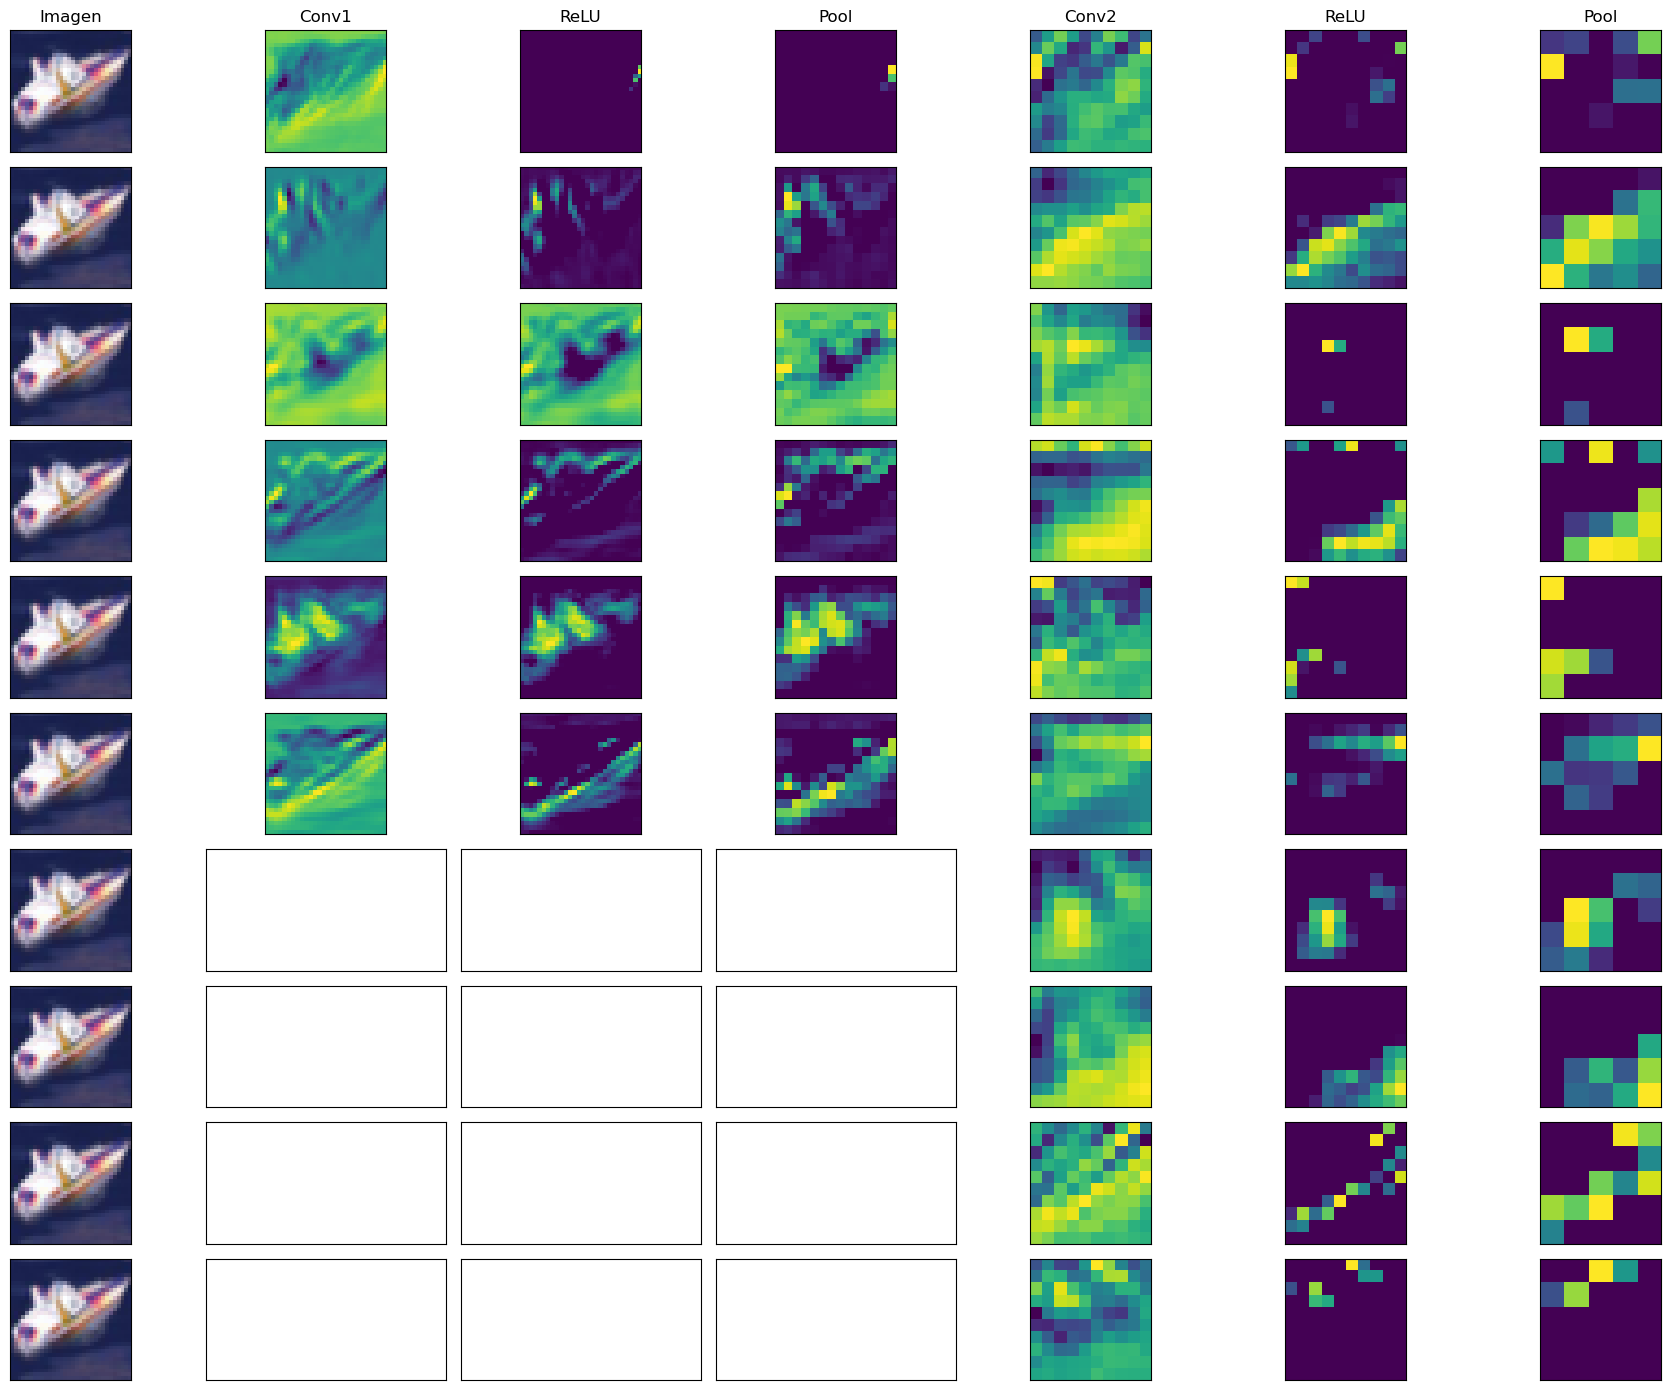

In [ ]:
import matplotlib.pyplot as plt
lote_image, lote_label = next(iter(testloader))
if resNet:
  lote_mapa1 = model.conv(lote_image)
  lote_mapa2 = model.bn(lote_mapa1)
  lote_mapa3 = model.relu(lote_mapa2)
  lote_mapa4 = model.layer1[0].conv1(lote_mapa3)
  lote_mapa5 = model.layer1[0].bn1(lote_mapa4)
  lote_mapa6 = model.layer1[0].relu(lote_mapa5)
  lote_mapa7 = model.layer1[0].conv2(lote_mapa6)
  lote_mapa8 = model.layer1[0].bn2(lote_mapa7)
  lote_mapa9 = model.layer1[1].conv1(lote_mapa8)
  lote_mapa10 = model.layer1[1].bn1(lote_mapa9)
  lote_mapa11 = model.layer1[1].relu(lote_mapa10)
  lote_mapa12 = model.layer1[1].conv2(lote_mapa11)
  lote_mapa13 = model.layer1[1].bn2(lote_mapa12)
  lote_mapa14 = model.layer2[0].conv1(lote_mapa13)
  lote_mapa15 = model.layer2[0].bn1(lote_mapa14)
elif convolucionProfunda:
  conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
  lote_mapa1 = conv1(lote_image)
  lote_mapa2 = F.relu(lote_mapa1)
  conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
  lote_mapa3 = conv2(lote_mapa2)
  lote_mapa4 = F.relu(lote_mapa3)
  pool = nn.MaxPool2d(2, 2)
  lote_mapa5 = pool(lote_mapa4)
  conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
  lote_mapa6 = conv3(lote_mapa5)
  lote_mapa7 = F.relu(lote_mapa6)
  conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
  lote_mapa8 = conv4(lote_mapa7)
  lote_mapa9 = F.relu(lote_mapa8)
  lote_mapa10 = pool(lote_mapa9)
  conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
  lote_mapa11 = conv5(lote_mapa10)
  lote_mapa12 = F.relu(lote_mapa11)
  conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
  lote_mapa13 = conv6(lote_mapa12)
  lote_mapa14 = F.relu(lote_mapa13)
  lote_mapa15 = pool(lote_mapa14)
else:
  lote_mapa1 = model.conv1(lote_image)
  lote_mapa2 = F.relu(lote_mapa1)
  lote_mapa3 = model.pool(lote_mapa2)
  lote_mapa4 = model.conv2(lote_mapa3)
  lote_mapa5 = F.relu(lote_mapa4)
  lote_mapa6 = model.pool(lote_mapa5)
image = lote_image[0]  ## Se coge la primera imagen del lote
mapa1 = lote_mapa1[0]
mapa2 = lote_mapa2[0]
mapa3 = lote_mapa3[0]
mapa4 = lote_mapa4[0]
mapa5 = lote_mapa5[0]
mapa6 = lote_mapa6[0]
if convolucionProfunda or resNet:
  mapa7 = lote_mapa7[0]
  mapa8 = lote_mapa8[0]
  mapa9 = lote_mapa9[0]
  mapa10 = lote_mapa10[0]
  mapa11 = lote_mapa11[0]
  mapa12 = lote_mapa12[0]
  mapa13 = lote_mapa13[0]
  mapa14 = lote_mapa14[0]
  mapa15 = lote_mapa15[0]
label = int(lote_label[0])
numCols = 16 if convolucionProfunda or resNet else 7
fig, ax = plt.subplots(nrows=10, ncols=numCols, figsize=(18,14))
#ax = ax.flatten()
if resNet:
  literales=['Imagen', 'Conv', 'Normal', 'ReLU', 'Conv', 'Normal', 'ReLU', 'Conv', 'Normal', 'Conv', 'Normal', 'ReLU', 'Conv', 'Normal', 'Conv', 'Normal', 'ReLU']
elif convolucionProfunda:
  literales=['Imagen', 'Conv1', 'ReLU', 'Conv2', 'ReLU', 'Pool', 'Conv3', 'ReLU', 'Conv4', 'ReLU', 'Pool', 'Conv5', 'ReLU', 'Conv6', 'ReLU', 'Pool']
else:
  literales=['Imagen', 'Conv1', 'ReLU', 'Pool', 'Conv2', 'ReLU', 'Pool']
for i in range(10):
    ax[i][0].imshow(image.numpy().transpose((1, 2, 0)))
    if i < mapa1.shape[0]:
        ax[i][1].imshow(mapa1[i].detach().numpy())
        ax[i][2].imshow(mapa2[i].detach().numpy())
        ax[i][3].imshow(mapa3[i].detach().numpy())
    ax[i][4].imshow(mapa4[i].detach().numpy())
    ax[i][5].imshow(mapa5[i].detach().numpy())
    ax[i][6].imshow(mapa6[i].detach().numpy())
    if convolucionProfunda or resNet:
      ax[i][7].imshow(mapa7[i].detach().numpy())
      ax[i][8].imshow(mapa8[i].detach().numpy())
      ax[i][9].imshow(mapa9[i].detach().numpy())
      ax[i][10].imshow(mapa10[i].detach().numpy())
      ax[i][11].imshow(mapa11[i].detach().numpy())
      ax[i][12].imshow(mapa12[i].detach().numpy())
      ax[i][13].imshow(mapa13[i].detach().numpy())
      ax[i][14].imshow(mapa14[i].detach().numpy())
      ax[i][15].imshow(mapa15[i].detach().numpy())
    for j in range(numCols):
        ax[i][j].set_yticks([])
        ax[i][j].set_xticks([])
        ax[0][j].set_title(literales[j])

#fig.suptitle('Imagen tipo ' + str(clases[label]), fontsize=16)
plt.tight_layout()
plt.show()

### Se visualiza la predicción

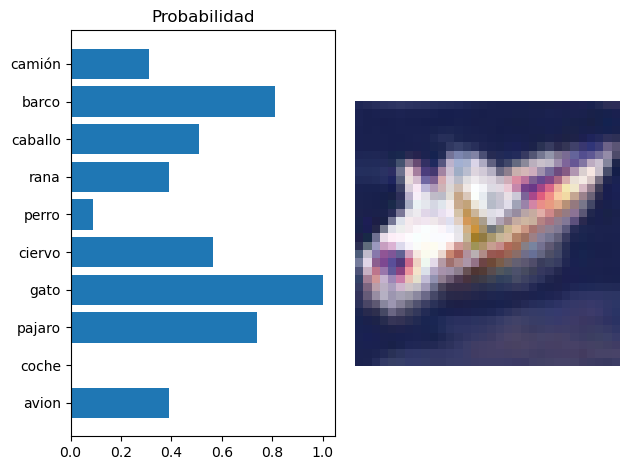

In [ ]:
#b_x = Variable(lote_image)   # batch x
#output = model(b_x)
output = model(lote_image)
fig, (ax1, ax2) = plt.subplots( ncols=2)
y=output[0].detach().numpy()
y = (y - min(y))/(max(y)-min(y))
ax2.axis('off')
ax2.imshow(image.numpy().transpose((1, 2, 0)))
ax1.set_yticks(np.arange(10))
ax1.barh(np.arange(10), y)
ax1.set_yticklabels(clases)
ax1.set_title('Probabilidad')
plt.tight_layout()